Mean Squared Error (MSE): 0.5559
R² Score: 0.5758

Feature Coefficients:
      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708


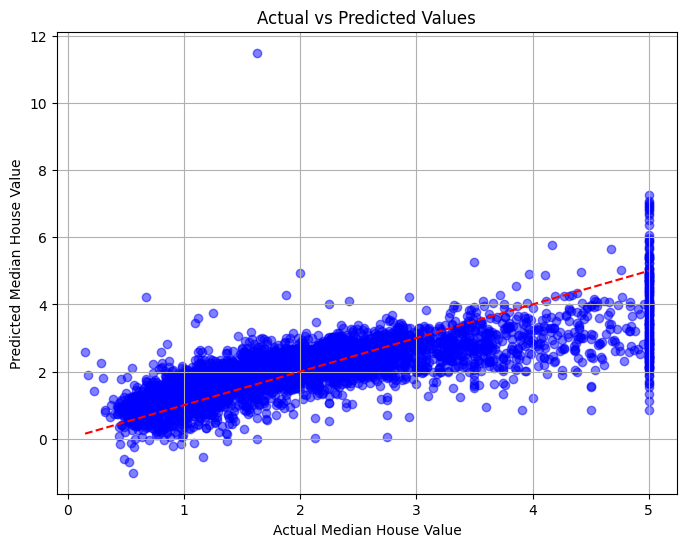

In [9]:
# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame  # Full dataset as a DataFrame

# 3. Separate features (X) and target (y)
X = df.drop(columns="MedHouseVal")
y = df["MedHouseVal"]

# 4. Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict on the test set
y_pred = model.predict(X_test)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# 8. Display model coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\nFeature Coefficients:")
print(coef_df)

# 9. Optional: Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()
